<a href="https://colab.research.google.com/github/Lanzero225/Diabetes-Analysis/blob/main/diabetes_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Analysis

////
BOTS

This analysis aims to examine diabetes indicators of different patients. By analyzing key factors such as prior health conditions, habits, diet, and other variables. This analysis seeks to dig up any notable insights that can help further understand diabetes.

The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.
CDC Diabetes Health Indicators


In [11]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")
diabetes_dataframe = pd.read_csv(path + "/diabetes_binary_health_indicators_BRFSS2015.csv")


Using Colab cache for faster access to the 'diabetes-health-indicators-dataset' dataset.


In [6]:
diabetes_dataframe.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [10]:
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentH

In [12]:
cols_to_convert = diabetes_dataframe.columns.drop(['BMI'])
diabetes_dataframe[cols_to_convert] = diabetes_dataframe[cols_to_convert].astype('int8')

diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  int8   
 1   HighBP                253680 non-null  int8   
 2   HighChol              253680 non-null  int8   
 3   CholCheck             253680 non-null  int8   
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int8   
 6   Stroke                253680 non-null  int8   
 7   HeartDiseaseorAttack  253680 non-null  int8   
 8   PhysActivity          253680 non-null  int8   
 9   Fruits                253680 non-null  int8   
 10  Veggies               253680 non-null  int8   
 11  HvyAlcoholConsump     253680 non-null  int8   
 12  AnyHealthcare         253680 non-null  int8   
 13  NoDocbcCost           253680 non-null  int8   
 14  GenHlth               253680 non-null  int8   
 15  

In [20]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'x', 'test']
diabetes_dataframe['BMI_Category'] = pd.cut(diabetes_dataframe['BMI'], bins=bmi_bins, labels=bmi_labels)
diabetes_dataframe['BMI_Category'].value_counts()

,count
BMI_Category,
Overweight,93749
Normal,68953
Obese,53451
x,20663
test,13737
Underweight,3127


In [21]:
diabetes_dataframe['BMI'].describe()

,BMI
count,253680.000000
mean,28.382364
std,6.608694
min,12.000000
25%,24.000000
50%,27.000000
75%,31.000000
max,98.000000


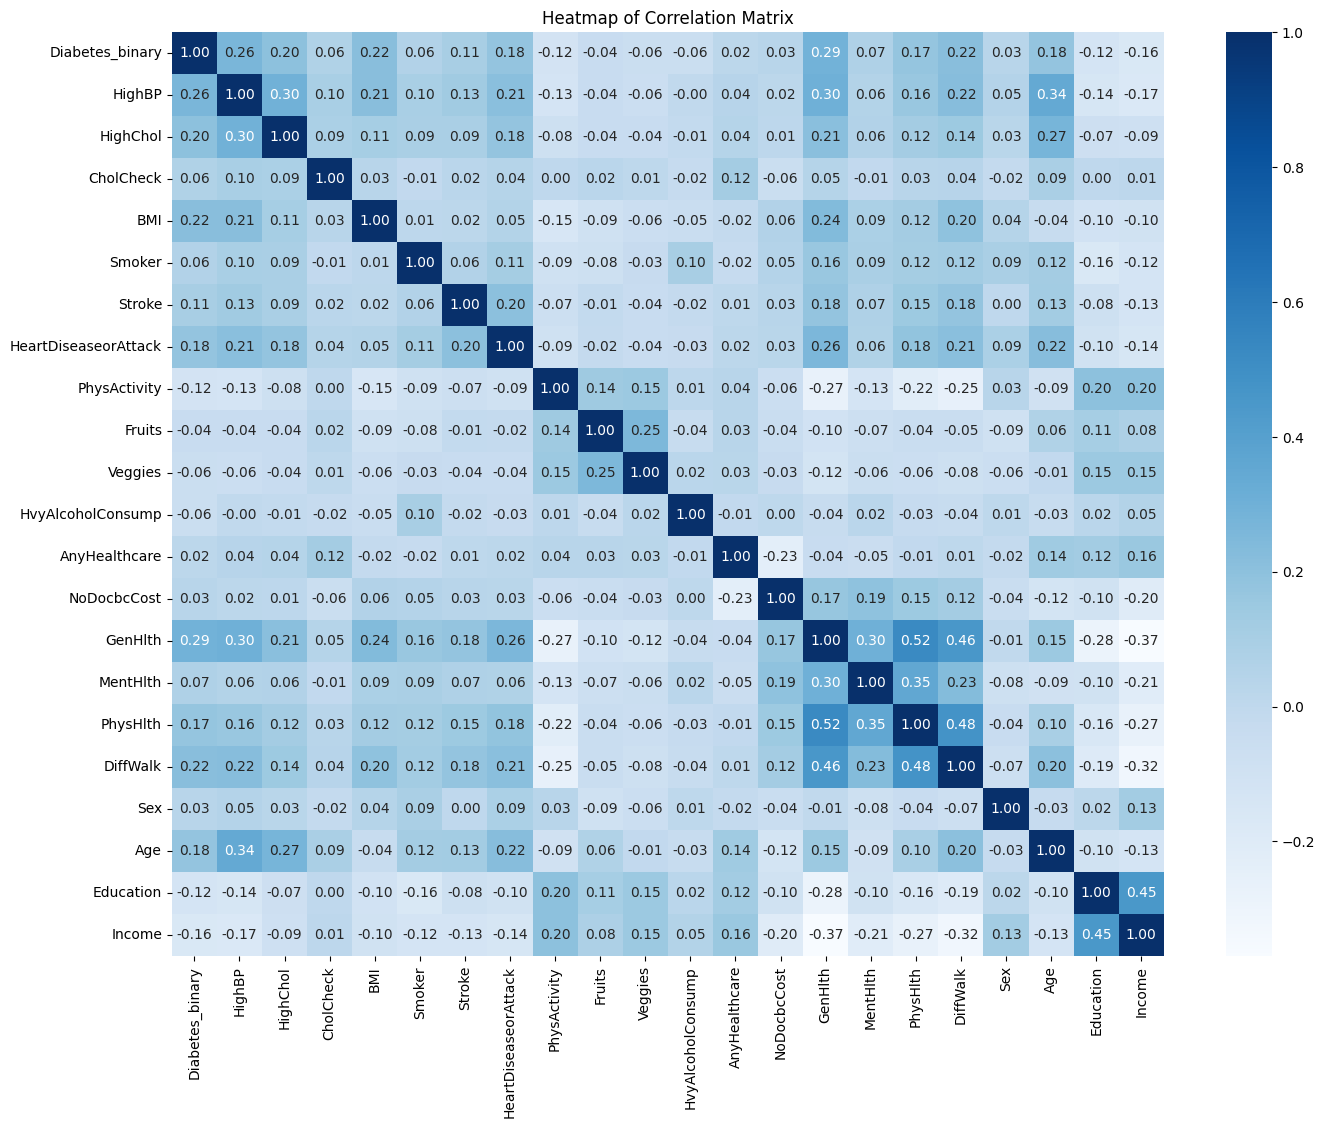

In [3]:
corr_matrix = diabetes_dataframe.corr()
plt.figure(figsize=(16, 12)) # Optional: adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap of Correlation Matrix') # Optional: add a title
plt.show()
